<a href="https://colab.research.google.com/github/r-feynman95/leyendamenu.github.io/blob/main/honors_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [ ]:
!pip install geopandas
!pip install pylandtemp
!pip install rasterio

import math
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

from datetime import datetime
from shapely.geometry import Point
from matplotlib.pyplot import figure
from shapely.geometry import Polygon
from rasterio.mask import mask
from shapely.geometry import box

Load the bands from the scene in and store them as numpy arrays.

In [87]:
# Load scene red, green, and blue bands to create the map image of the study area
redband = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B4.TIF'
greenband = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B3.TIF'
blueband = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B2.TIF'

nirband = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B5.TIF'
tempband10 = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B10.TIF'
tempband11 = '/content/drive/MyDrive/Honors Project/LC08_L1TP_013032_20190627_20200827_02_T1_B11.TIF'

with rasterio.open(redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(greenband) as src:
    greenImage = src.read(1).astype('f4')
    
with rasterio.open(blueband) as src:
    blueImage = src.read(1).astype('f4')
    print(src.bounds)  # Find the CRS (Coordinate Reference System) of the scene so the Geopandas Rectangle can be matched to it

with rasterio.open(nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(tempband10) as src:
    tempImage10 = src.read(1).astype('f4')

with rasterio.open(tempband11) as src:
    tempImage11 = src.read(1).astype('f4')

BoundingBox(left=527085.0, bottom=4348785.0, right=756915.0, top=4582215.0)


Crop bands to polygon defined by coordinates of the study area and save these cropped tif files. 

In [88]:
from pyproj import Proj, transform

# define the list of coordinate tuples
# Bartel Pritchard Square   40.661078, -73.979875
# Grand Army                40.672527, -73.970512
# 6th Ave and Union         40.675449, -73.978018
# 6th Ave and 15th          40.664439, -73.986979

coord1 = (40.661078, -73.979875)
coord2 = (40.672527, -73.970512)
coord3 = (40.675449, -73.978018)
coord4 = (40.664439, -73.986979)

coords = [coord1, coord2, coord3, coord4]

in_proj = Proj(init='EPSG:4326')  # WGS84 lat/lon
out_proj = Proj(init='EPSG:32618')  # UTM zone 18N
x1, y1 = transform(in_proj, out_proj, coord1[1], coord1[0])
x2, y2 = transform(in_proj, out_proj, coord2[1], coord2[0])
x3, y3 = transform(in_proj, out_proj, coord3[1], coord3[0])
x4, y4 = transform(in_proj, out_proj, coord4[1], coord4[0])

polygon = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

print(polygon)

with rasterio.open(redband) as src:
    # Crop the file to the extent of the polygon
    red_image, out_transform = mask(src, [polygon], crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                     "height": red_image.shape[1],
                     "width": red_image.shape[2],
                     "transform": out_transform})
    
    # Save the cropped image to a new GeoTIFF file
    with rasterio.open("red.tif", "w", **out_meta) as dest:
        dest.write(red_image)
    
with rasterio.open(blueband) as src:
  # Crop the file to the extent of the polygon
  blue_image, out_transform = mask(src, [polygon], crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                    "height": blue_image.shape[1],
                    "width": blue_image.shape[2],
                    "transform": out_transform})
  
  # Save the cropped image to a new GeoTIFF file
  with rasterio.open("blue.tif", "w", **out_meta) as dest:
      dest.write(blue_image)

with rasterio.open(greenband) as src:
  # Crop the file to the extent of the polygon
  green_image, out_transform = mask(src, [polygon], crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                    "height": green_image.shape[1],
                    "width": green_image.shape[2],
                    "transform": out_transform})
  
  # Save the cropped image to a new GeoTIFF file
  with rasterio.open("green.tif", "w", **out_meta) as dest:
      dest.write(green_image)


with rasterio.open(nirband) as src:
  # Crop the file to the extent of the polygon
  nirband_image, out_transform = mask(src, [polygon], crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                    "height": nirband_image.shape[1],
                    "width": nirband_image.shape[2],
                    "transform": out_transform})
  
  # Save the cropped image to a new GeoTIFF file
  with rasterio.open("nir.tif", "w", **out_meta) as dest:
      dest.write(nirband_image)

with rasterio.open(tempband10) as src:
  # Crop the file to the extent of the polygon
  tempband10_image, out_transform = mask(src, [polygon], crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                    "height": tempband10_image.shape[1],
                    "width": tempband10_image.shape[2],
                    "transform": out_transform})
  
  # Save the cropped image to a new GeoTIFF file
  with rasterio.open("tempband10.tif", "w", **out_meta) as dest:
      dest.write(tempband10_image)

with rasterio.open(tempband11) as src:
  # Crop the file to the extent of the polygon
  tempband11_image, out_transform = mask(src, [polygon], crop=True)
  out_meta = src.meta.copy()
  out_meta.update({"driver": "GTiff",
                    "height": tempband11_image.shape[1],
                    "width": tempband11_image.shape[2],
                    "transform": out_transform})
  
  # Save the cropped image to a new GeoTIFF file
  with rasterio.open("tempband11.tif", "w", **out_meta) as dest:
      dest.write(tempband11_image)


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-88-0f64fb52b722>:18: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x1, y1 = transform(in_proj, out_proj, coord1[1], coo

POLYGON ((586232.7353557668 4501634.841494905, 587009.334504483 4502914.972035617, 586371.1677096246 4503231.928534736, 585627.9149750129 4502000.988206959, 586232.7353557668 4501634.841494905))


Import the cropped tif files and store them as numpy arrays

In [90]:
# Load scene red, green, and blue bands to create the map image of the study area
redband = '/content/red.tif'
greenband = '/content/green.tif'
blueband = '/content/blue.tif'

nirband = '/content/nir.tif'
tempband10 = '/content/tempband10.tif'
tempband11 = '/content/tempband11.tif'

with rasterio.open(redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(greenband) as src:
    greenImage = src.read(1).astype('f4')
    
with rasterio.open(blueband) as src:
    blueImage = src.read(1).astype('f4')
    print(src.bounds)  # Find the CRS (Coordinate Reference System) of the scene so the Geopandas Rectangle can be matched to 

with rasterio.open(nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(tempband10) as src:
    tempImage10 = src.read(1).astype('f4')

with rasterio.open(tempband11) as src:
    tempImage11 = src.read(1).astype('f4')

BoundingBox(left=585615.0, bottom=4501605.0, right=587025.0, top=4503255.0)


Normalize the data and stack the images into new numpy array called RGB

In [85]:
# Normalize the data in each band
redImage_norm = (redImage - redImage.min()) / (redImage.max() - redImage.min())
greenImage_norm = (greenImage - greenImage.min()) / (greenImage.max() - greenImage.min())
blueImage_norm = (blueImage - blueImage.min()) / (blueImage.max() - blueImage.min())

# Stack the bands to create an RGB image
rgb = np.dstack((redImage_norm, greenImage_norm, blueImage_norm))

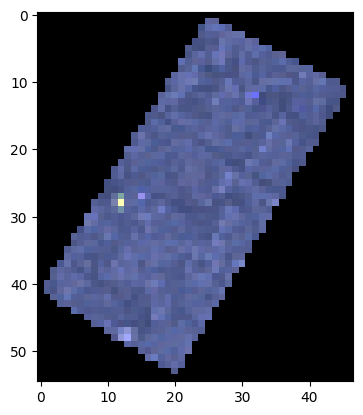

<Figure size 1500x1500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [86]:
# Display the RGB image
plt.imshow(rgb)

# Set the figure size
fig = plt.figure(figsize=(15, 15))

plt.show()
plt.savefig('landsat_rgb.png')

(3511, 3565)


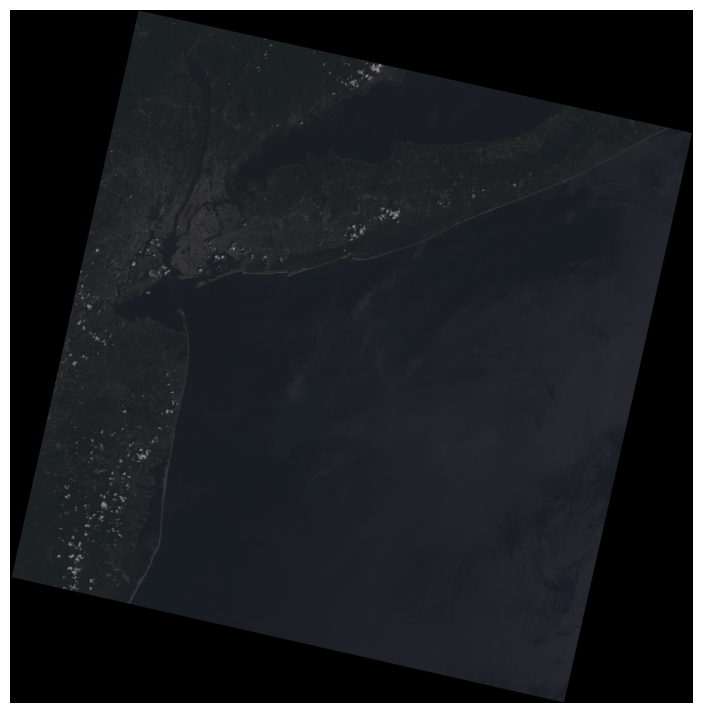

In [74]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a figure with a larger size
fig = plt.figure(figsize=(16, 9))

# Plot the RGB image
plt.imshow(rgb)

# Remove the axis ticks and labels
plt.axis('off')

# Save the plot as a PNG image
fig.savefig('landsat_plot.png', dpi=500, bbox_inches='tight')

# Open the saved image
img = Image.open('landsat_plot.png')

# Display the image size
print(img.size)

In order to calculate LST we need bands 4,5,10 and 11. Band 4 was already loaded above. So we will import bands 5,10, and 11 here. 

In [91]:
from pylandtemp import split_window

method = 'jiminez-munoz'
lst_image_split_window = split_window(
    tempImage10, 
    tempImage11, 
    redImage, 
    nirImage, 
    lst_method=method, 
    emissivity_method='avdan',
    unit='kelvin'
)

Find the average temperature of the study area. The numpy array will have many NaN values so use the nanmean to ignore these values when calculating the mean. 

In [102]:
average_value = np.nanmean(lst_image_split_window)

print("Average value of the heatmap:", average_value)

Average value of the heatmap: 312.0446


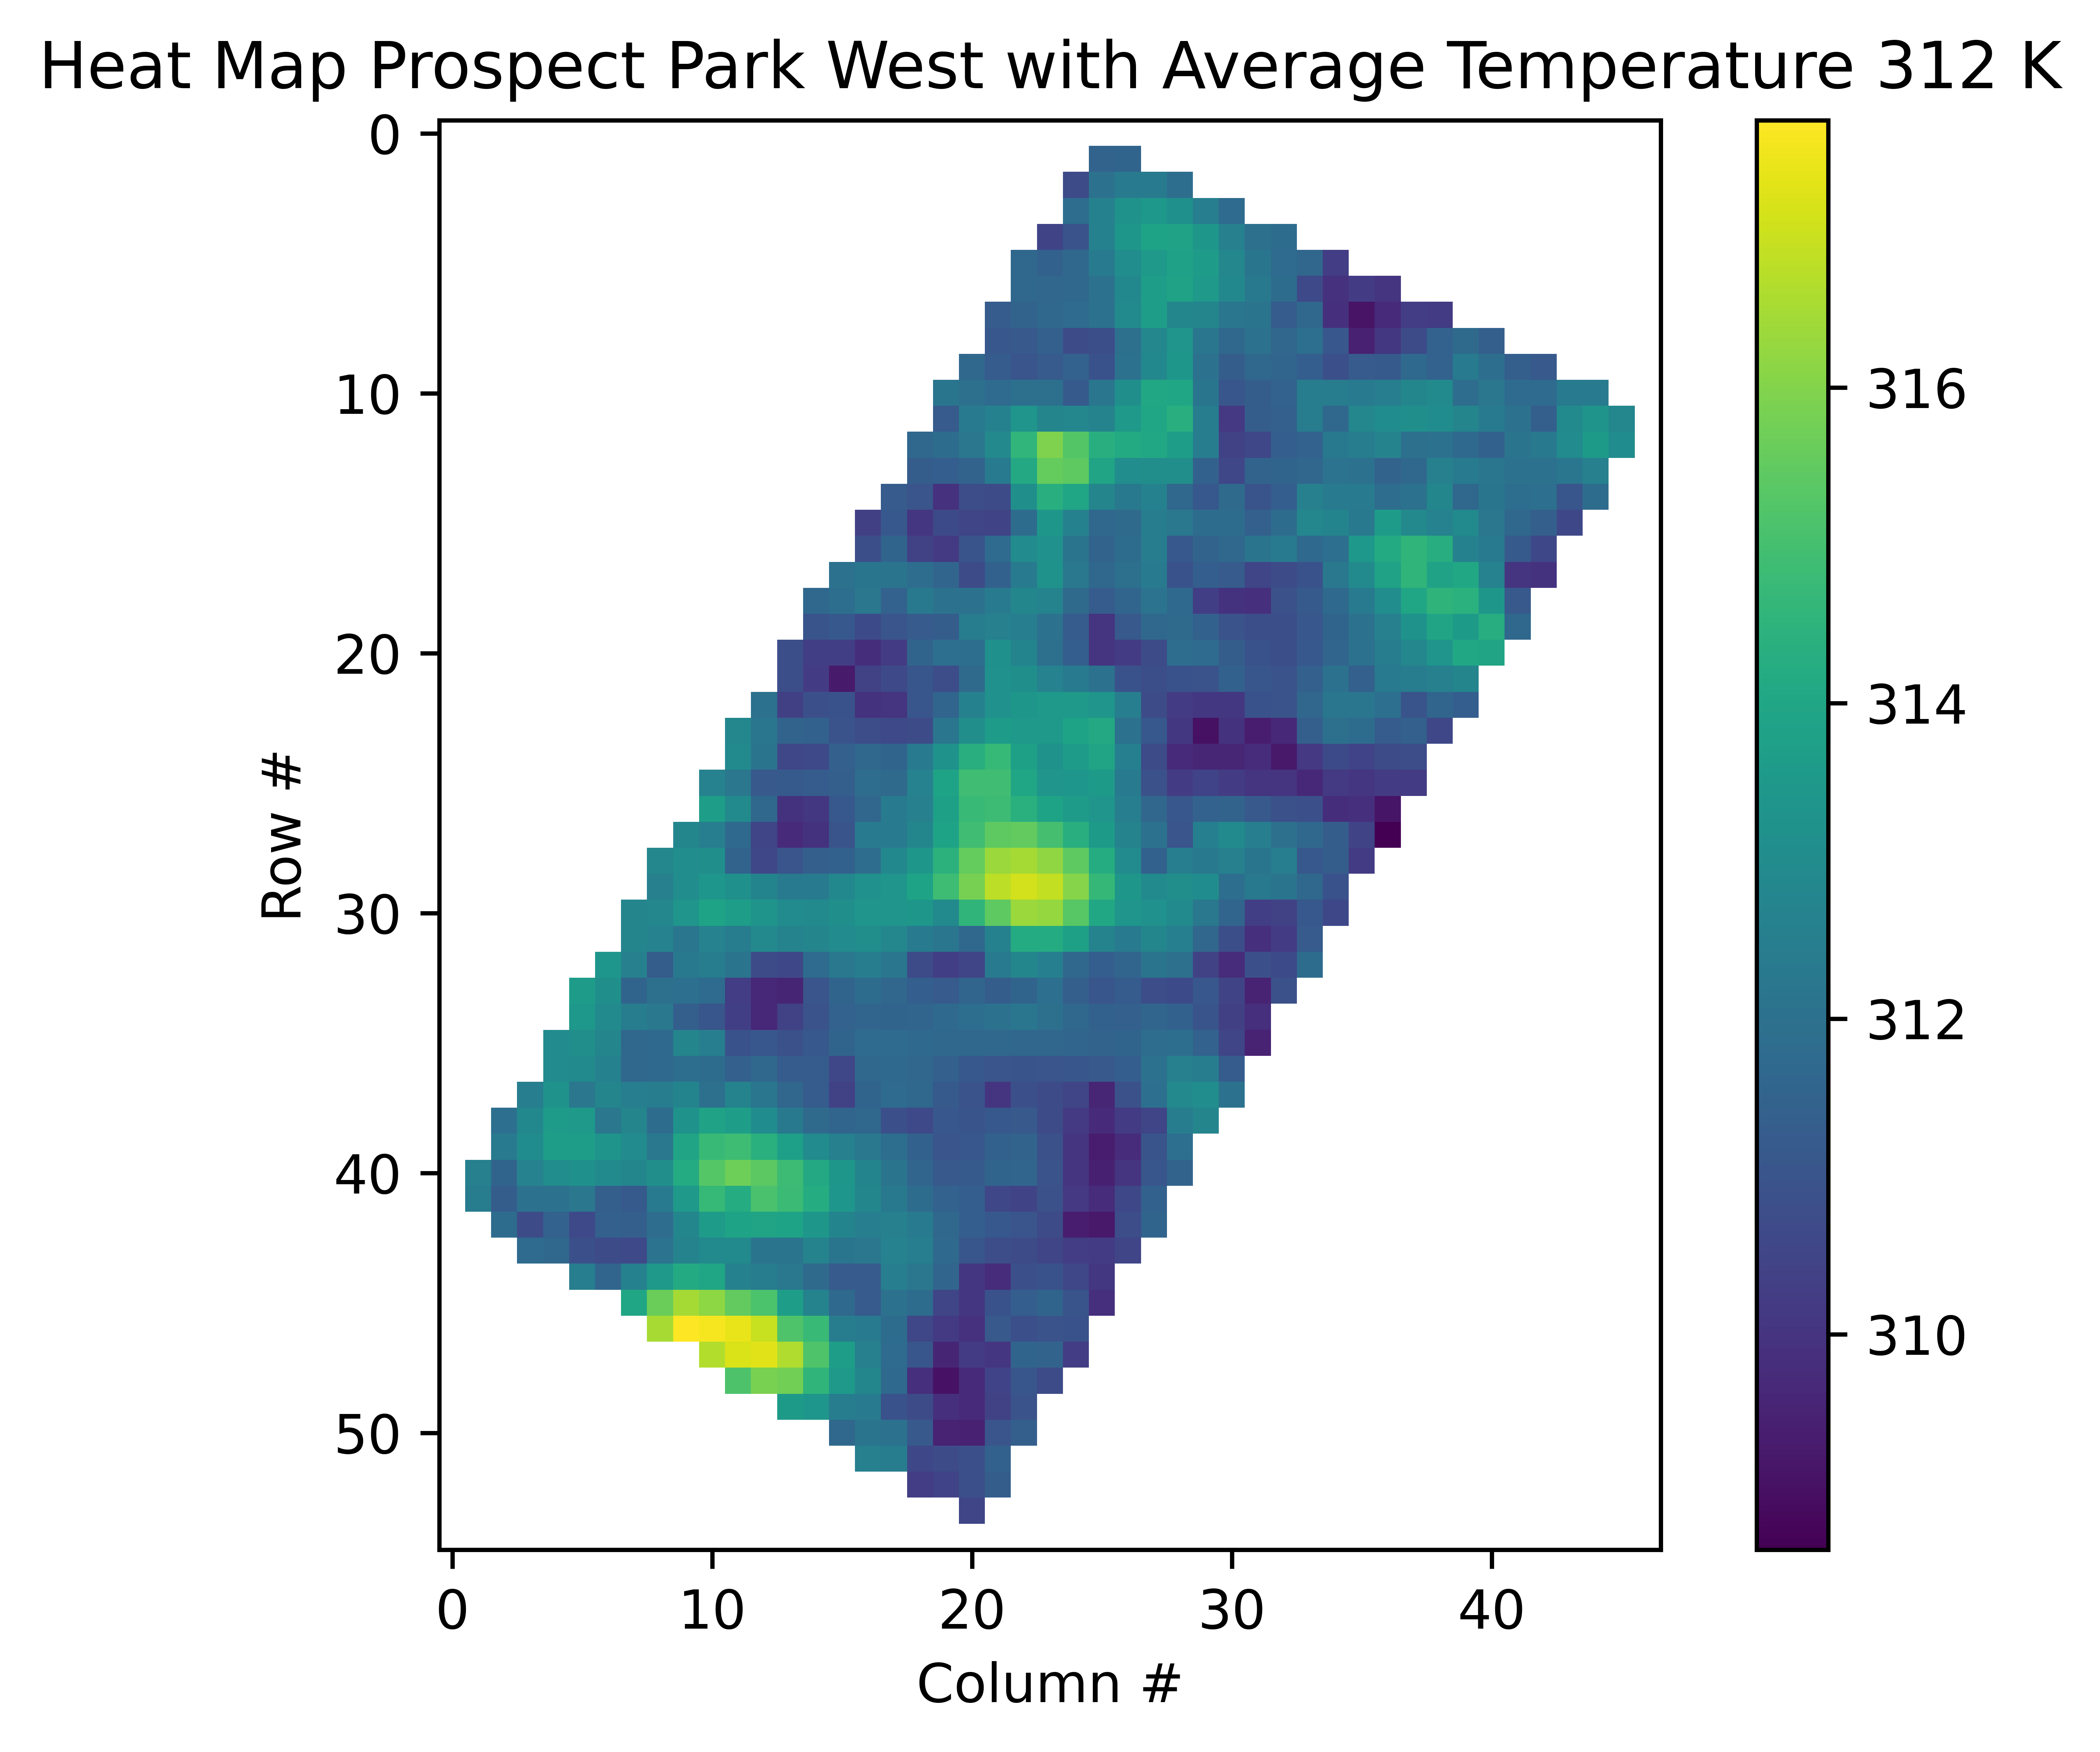

<Figure size 6400x4800 with 0 Axes>

In [104]:
plt.imshow(lst_image_split_window, cmap='viridis')
plt.colorbar()
plt.title('Heat Map Prospect Park West with Average Temperature 312 K')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# Set a high DPI to get a high-resolution image
plt.rcParams['figure.dpi'] = 1000

# Save the figure as a PNG with a transparent background
plt.savefig('figure.png', dpi=1000, transparent=True)

(3198, 3680)


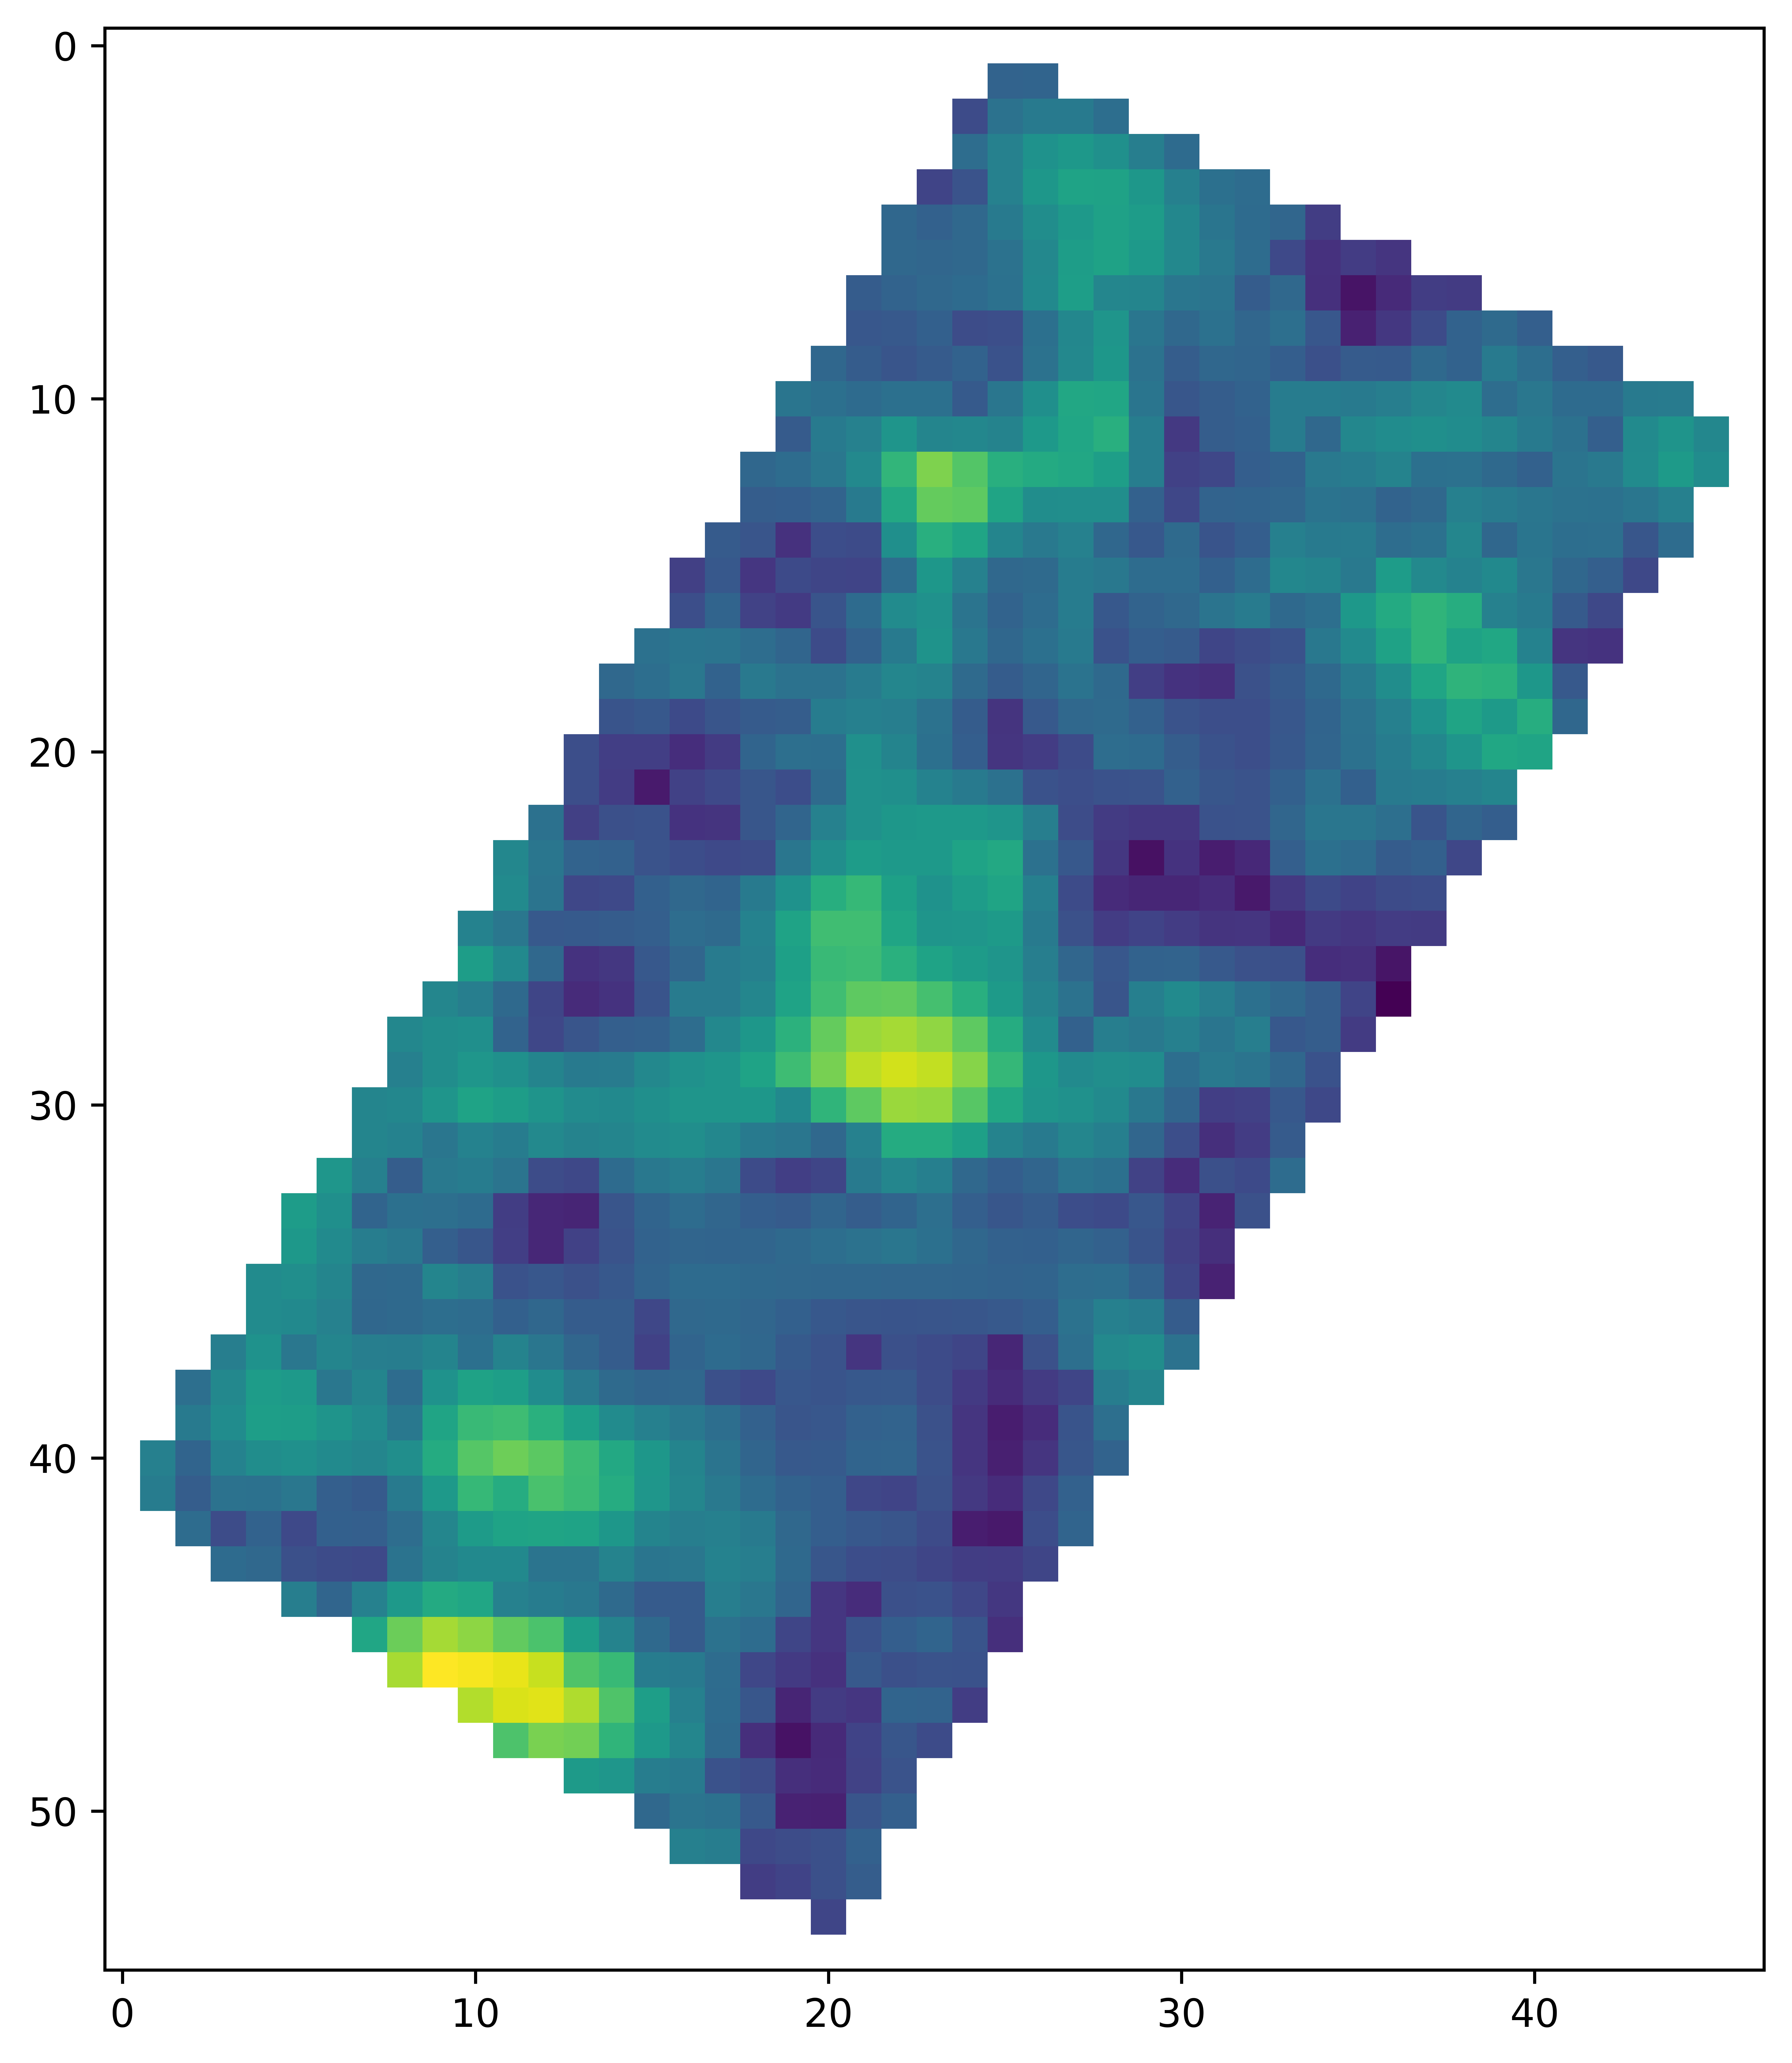

In [93]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a figure with a larger size
fig = plt.figure(figsize=(16, 9))

# Plot the LST image
plt.imshow(lst_image_split_window)

# Remove the axis ticks and labels
plt.axis('on')

# Save the plot as a PNG image
fig.savefig('landsat_plot.png', dpi=500, bbox_inches='tight')

# Open the saved image
img = Image.open('landsat_plot.png')

# Display the image size
print(img.size)

Everything below attempts to crop the information in the TIF image to include only the space in the study area. I'm realizing now that this can be done on the stacked image instead of on each band seperately. I understand that it would be more efficient to crop first before processing the data into a normalized stacked image, but time and processing power isn't an issue here. 

Below are various attempt to generate a study area from two points were the size of the area could be defined before hand. Currently a work in progress

In [17]:
# study area coordinates

# Bartel Pritchard Square   40.661078, -73.979875
# Grand Army                40.672527, -73.970512
# 6th Ave and Union         40.675449, -73.978018
# 6th Ave and 15th          40.664439, -73.986979

coord1 = (40.661078, -73.979875)
coord2 = (40.672527, -73.970512)
coord3 = (40.672527, -73.970512)
coord4 = (40.664439, -73.986979)

Find and return the distance between the points

In [12]:
import math

def distance(coord1, coord2):
    # extract latitudes and longitudes from coordinates
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # calculate haversine
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371 # radius of Earth in kilometers
    d = c * r * 1000 # convert to meters

    return d

In [67]:
def get_perpendicular_rectangle(lat1, lon1, lat2, lon2, distance):
    # Convert latitudes and longitudes to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Calculate the slope of the line
    slope = (lat2 - lat1) / (lon2 - lon1)

    # Calculate the slope of the perpendicular line
    slope_perpendicular = -1 / slope

    # Calculate the change in latitude and longitude needed to move distance meters along the perpendicular line
    delta_lat = distance / (111132.954 - 559.822 * math.cos(2 * lat1) + 1.175 * math.cos(4 * lat1 - 1.5 * lat2) - 0.0023 * math.cos(6 * lat1) + 0.0000052 * math.cos(8 * lat1))
    delta_lon = delta_lat / math.cos(lat1) * slope_perpendicular

    # Calculate the coordinates of the four points
    point1_lat = lat1 + delta_lat
    point1_lon = lon1 + delta_lon
    point2_lat = lat1 - delta_lat
    point2_lon = lon1 - delta_lon
    point3_lat = lat2 - delta_lat
    point3_lon = lon2 - delta_lon
    point4_lat = lat2 + delta_lat
    point4_lon = lon2 + delta_lon

    # Convert the coordinates back to degrees
    point1_lat, point1_lon, point2_lat, point2_lon, point3_lat, point3_lon, point4_lat, point4_lon = map(math.degrees, [point1_lat, point1_lon, point2_lat, point2_lon, point3_lat, point3_lon, point4_lat, point4_lon])

    # Create a Polygon from the four points
    polygon = Polygon([(point1_lon, point1_lat), (point2_lon, point2_lat), (point3_lon, point3_lat), (point4_lon, point4_lat)])

    # Create a GeoDataFrame with the Polygon
    gdf = gpd.GeoDataFrame(geometry=[polygon])

    return gdf


In [77]:
import pyproj
from shapely.geometry import box

def create_box(lon1, lat1, lon2, lat2, distance_m):
    # Define the projection systems
    wgs84 = pyproj.CRS('EPSG:4326')
    utm = pyproj.CRS('EPSG:32618')
    
    # Convert the points to UTM coordinates
    project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True)
    x1, y1 = project.transform(lon1, lat1)
    x2, y2 = project.transform(lon2, lat2)
    
    # Calculate the size of the box based on the distance
    dx = distance_m / 2.0
    dy = distance_m / 2.0
    
    # Create the box
    minx = min(x1, x2) - dx
    maxx = max(x1, x2) + dx
    miny = min(y1, y2) - dy
    maxy = max(y1, y2) + dy
    return box(minx, miny, maxx, maxy)

We can provide two points to the get_perpendicular_rectangle function in lat, lon and a desired distance in meters (in this case 300 meters). In order to use the pylandsat search the output has to be in a geojson file format. 

In [68]:
study_area = get_perpendicular_rectangle(40.7128, -74.0060, 40.7153, -74.0101, 300)
print(study_area)

study_area.crs = 'EPSG:4326' # World Geodetic System 1984 used in Google Maps
print(src.crs)
study_area = study_area.to_crs(src.crs)

print(study_area)
# Create a shapely box from the geopandas rectangle bounds
bounds = study_area.total_bounds
box_geom = box(*bounds)

                                            geometry
0  POLYGON ((-73.67110 40.86758, -74.34090 40.558...
EPSG:32618
                                            geometry
0  POLYGON ((611986.988 4524907.719, 555800.513 4...
